<a href="https://colab.research.google.com/github/claredavies/MachineLearningCoursework/blob/main/Assignment3HumanActivityRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<html><h1><center style="color:blue">Human Activity Recognition with Smartphones</center></h1></html>

In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
pd.set_option('display.max_rows', None)

Upload zip UCI HAR Dataset.zip

In [2]:
!unzip "UCI HAR Dataset.zip"

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [3]:
# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


### Getting the  train data 

In [4]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4852,0.197054,-0.035518,-0.128307,0.122671,0.237702,0.253320,0.029674,0.178231,0.166163,0.385615,0.111500,0.009977,-0.168430,-0.259891,-0.200355,0.233085,-0.368059,-0.704183,-0.300068,-0.114904,-0.069160,-0.129402,0.226912,0.324541,0.326591,-0.412639,0.464163,-0.404753,0.321921,-0.159203,0.161602,0.119694,-0.068086,-0.151302,0.312749,-0.365574,0.336405,-0.287242,-0.471790,0.397456,...,-0.904762,0.128915,-0.259413,-0.545710,-0.174626,-0.408978,-0.314337,-0.507278,-0.545332,-0.174626,-0.700247,-0.241530,0.727554,-0.846154,0.440185,-0.570606,-0.827523,-0.105051,-0.345699,-0.161240,-0.528833,-0.866964,-0.105051,-0.659696,-0.067850,0.761529,-0.904762,0.148680,-0.738577,-0.932049,0.505981,0.350094,-0.705859,-0.952610,-0.804286,0.161008,0.143143,23,3,WALKING_DOWNSTAIRS
1702,0.321216,0.006537,-0.136812,-0.262584,0.358115,-0.383714,-0.288792,0.224176,-0.389518,-0.043931,0.072823,-0.277072,0.102936,-0.359987,0.486779,-0.088804,-0.726438,-0.644056,-0.825143,-0.335424,-0.213311,-0.448700,0.532593,0.328347,-0.057194,-0.574186,0.564515,-0.558226,0.482023,-0.148454,0.034381,0.514001,-0.424894,0.051824,0.045077,-0.084055,0.184693,-0.064800,-0.066408,0.143636,...,-0.968254,-0.063444,-0.477732,-0.811661,-0.219353,-0.240186,-0.207791,-0.232851,-0.748331,-0.219353,-0.632619,-0.142723,0.585072,-0.794872,0.069728,-0.196190,-0.496455,-0.412234,-0.585517,-0.523265,-0.605770,-0.705961,-0.412234,-0.855702,-0.440215,0.513020,-0.873016,0.377921,-0.421728,-0.696912,-0.214761,-0.434747,-0.514814,0.840682,-0.757628,0.264184,0.040357,8,1,WALKING


### Getting the  test data 

In [6]:
# get the data from txt files to pandas dataffame
# /content/UCI HAR Dataset/test/X_test.txt
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
493,0.27135,-0.021277,-0.104879,-0.994075,-0.929235,-0.933970,-0.995904,-0.921831,-0.942609,-0.945886,-0.543963,-0.797479,0.835246,0.654141,0.794286,-0.961950,-0.99995,-0.998747,-0.997137,-0.996874,-0.930473,-0.954371,-0.861875,-0.329345,-0.245510,-0.108622,0.146786,-0.25360,0.285099,0.036615,0.012436,0.003355,-0.056738,-0.016758,-0.005636,0.066255,-0.246149,0.081128,0.560047,-0.499396,...,-0.936508,0.29143,-0.440971,-0.770069,-0.874091,-0.889370,-0.888850,-0.910710,-0.664156,-0.874091,-0.991113,-0.938469,-0.249817,-0.948718,0.078428,-0.290319,-0.696604,-0.97180,-0.967132,-0.963623,-0.973079,-0.975415,-0.97180,-0.999426,-0.959239,-0.593933,-1.0,-0.443157,-0.290349,-0.707984,0.261931,-0.026215,0.648150,0.896370,-0.890052,0.123670,-0.057977,4,5,STANDING
977,0.27811,-0.026193,-0.110061,-0.995413,-0.944540,-0.975798,-0.997088,-0.945993,-0.978809,-0.938896,-0.556559,-0.807377,0.836858,0.663340,0.825362,-0.979861,-0.99997,-0.999056,-0.999397,-0.997149,-0.963086,-0.985821,-0.675879,-0.569208,-0.538611,0.505826,-0.302367,0.17783,0.192180,0.100846,-0.080277,0.106852,-0.127378,0.231682,0.015850,-0.070375,-0.011548,0.010187,-0.108981,0.401061,...,-0.936508,0.07187,-0.276189,-0.736752,-0.971258,-0.978924,-0.978334,-0.981523,-0.986181,-0.971258,-0.999538,-0.978797,-0.512435,-1.000000,0.474698,-0.436814,-0.759982,-0.97689,-0.960612,-0.961424,-0.971787,-0.993643,-0.97689,-0.999398,-0.984148,-0.701761,-1.0,-0.560439,-0.102605,-0.631436,0.098749,0.151240,-0.139048,-0.200769,0.658481,-0.088613,0.964425,10,6,LAYING


# Data Exploration

### 1. Check for Duplicates

In [8]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


No of duplicates in train: 0
No of duplicates in test : 0


### 2. Checking for NaN/null values

In [9]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [10]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [11]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

Activity per Subject

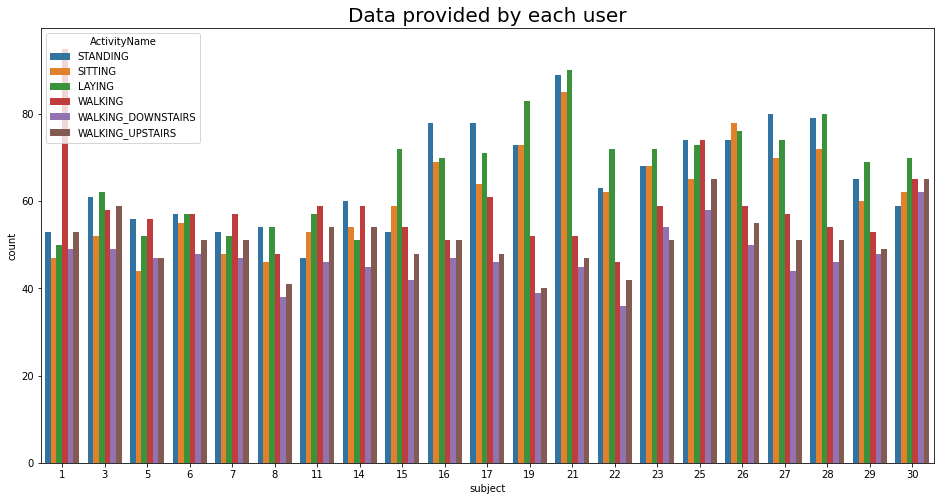

In [12]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

Activity Count

Text(0.5, 1.0, 'Count per Activity')

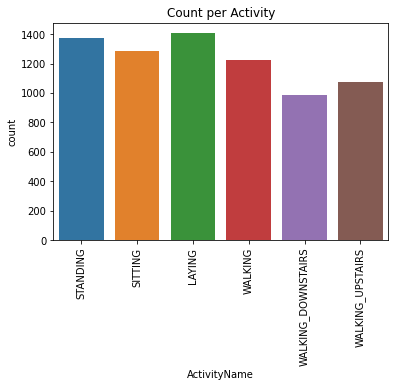

In [13]:
sns.countplot(x ='ActivityName', data = train)
plt.xticks(rotation=90)
plt.title("Count per Activity")

Moving vs Stationary Activities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

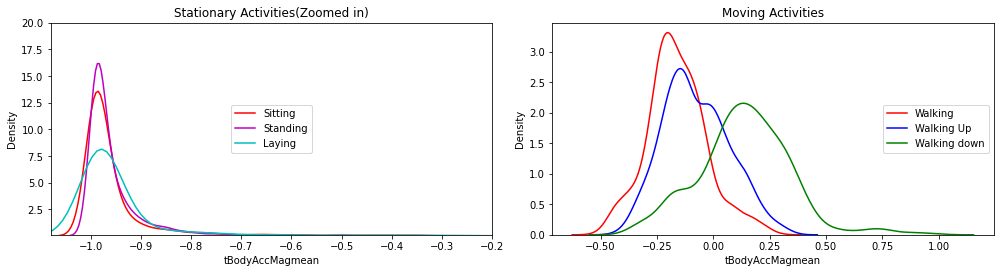

In [14]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

# Clustering

In [83]:
from sklearn.preprocessing import StandardScaler
X_train = train.drop(['subject', 'Activity','ActivityName'], axis=1)
X_test= train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_train = train['ActivityName']
y_test = train['ActivityName']

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Find parameter for episilon (maximum value at the curvature of the graph)

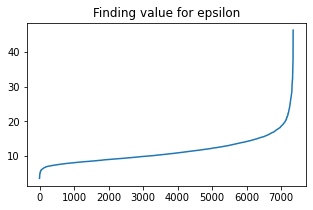

In [96]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_train) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_train) 

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.title("Finding value for epsilon")
plt.show() 

Paramter choosing min points

In [ ]:
# If the data has more than two dimensions, 
# the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension

Compute DBSCAN

In [93]:
from sklearn import metrics

def compute_DBSCAN(eps,min_samples,features,targets):
  # Compute DBSCAN
  db = DBSCAN(eps=eps, min_samples=min_samples).fit(features)
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
  print("no of clusters:  " + str(n_clusters_))
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(targets, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(targets, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(targets, labels))
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(targets, labels))
  print("Adjusted Mutual Information: %0.3f"
        % metrics.adjusted_mutual_info_score(targets, labels))
  print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(features, labels))
  
  return db

Plot DBSCAN Clustering

In [94]:
def plot_DBSCAN(db):
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = 'k'

      class_member_mask = (labels == k)

      xy =X_train[class_member_mask & core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
              markeredgecolor='k', markersize=14)

      xy = X_train[class_member_mask & ~core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
              markeredgecolor='k', markersize=6)

  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()

no of clusters:  1
Homogeneity: 0.014
Completeness: 0.190
V-measure: 0.027
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.026
Silhouette Coefficient: 0.449


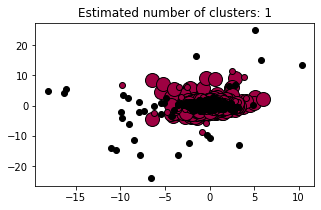

In [95]:
db = compute_DBSCAN(22,10,X_train,y_train)
plot_DBSCAN(db)

# Dimensional Reduction

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-16.138544,2.152024
1,-15.296194,1.387144
2,-15.137019,2.473351
3,-15.350884,3.915681
4,-15.544814,4.598737


In [77]:
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf.head()

,principal component 1,principal component 2,ActivityName
0,-16.138544,2.152024,STANDING
1,-15.296194,1.387144,STANDING
2,-15.137019,2.473351,STANDING
3,-15.350884,3.915681,STANDING
4,-15.544814,4.598737,STANDING


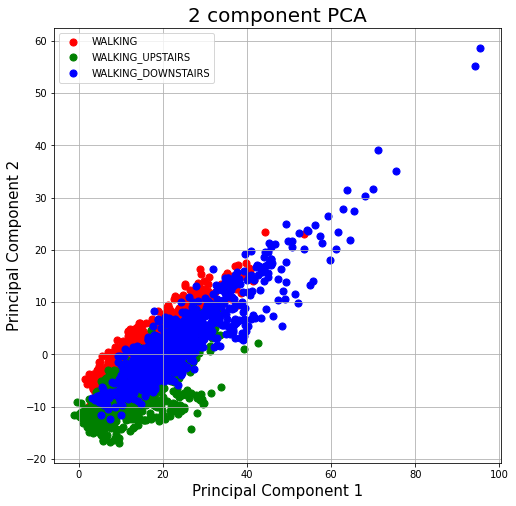

In [78]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
           'SITTING','STANDING','LAYING']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ActivityName'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Evaluation